In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/EXO 1846-031.txt")

EXO 1846-031
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,EXO 1846-031,68,[Williams et al. 2020 & https://ui.adsabs.harv...,[Williams et al. 2020 & https://ui.adsabs.harv...,NaN,NaN


In [4]:
source_df

,name,class,l_deg,b_deg,coordinates_refs,D,D_prob,distance_distribution_text,distance_refs
0,EXO 1846-031,candidateBH,29.96,-0.92,[],4.5,"(""uniform"", 2.4, 7.5)",2.4-7.5,[https://ui.adsabs.harvard.edu/abs/2020MNRAS.4...


In [5]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,EXO 1846-031,1564947058,L,58699.839,0.010417,rise,HS,6.9,0.365274,121,0.1,0.2,False
1,EXO 1846-031,1565459161,L,58705.803,0.010417,peak/trough,IMS,30.8,1.547288,91,-0.5,0.1,False
2,EXO 1846-031,1565987538,L,58711.904,0.010417,decay,IMS,12.4,0.637887,69,-0.7,0.1,False
3,EXO 1846-031,1566574272,L,58718.695,0.010417,peak/trough,SS,5.4,0.287924,69,-0.4,0.2,False
4,EXO 1846-031,1567272657,L,58726.779,0.010417,rise,SS,18.2,0.920706,67,-0.3,0.1,False


In [6]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,EXO 1846-031,11500002,58697.42856,0.345076,rise,HS,5.990000e-09,6.019975e-10,6.019975e-10,TBfeo*powerlaw,chi,False
1,EXO 1846-031,11500003,58700.40993,0.196267,rise,HS,1.210000e-08,1.214125e-09,1.214125e-09,TBfeo*powerlaw,chi,False
2,EXO 1846-031,11500004,58702.12473,0.072659,peak/trough,IMS,1.400000e-08,1.403567e-09,1.403567e-09,TBfeo*powerlaw,chi,False
3,EXO 1846-031,11500006,58703.40304,0.337780,unclear,IMS,2.400000e-08,3.841875e-09,4.664762e-09,TBfeo*(diskbb + powerlaw),chi,False


# Light Curves

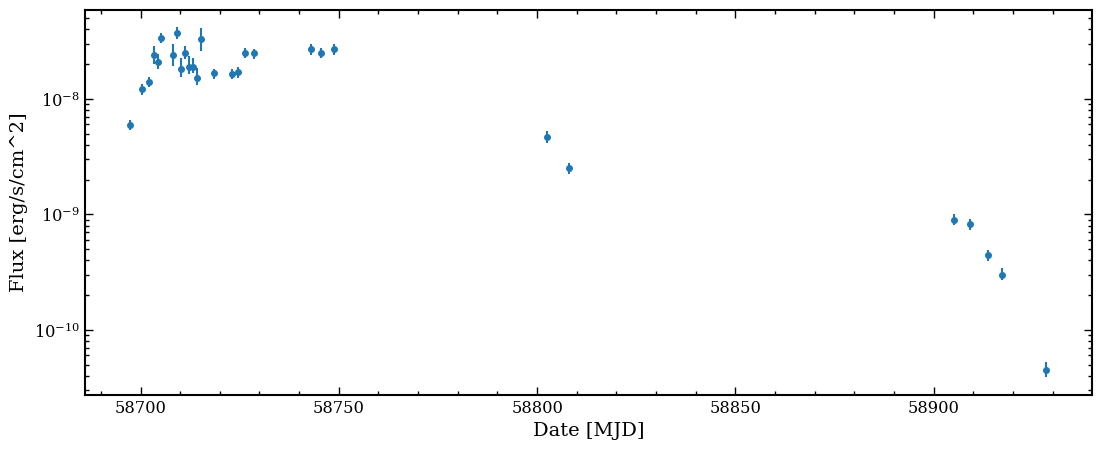

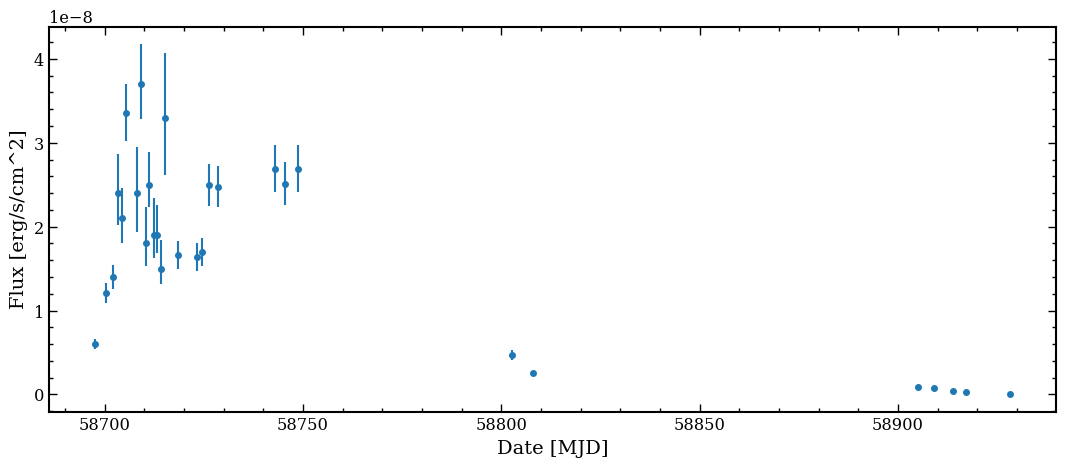

In [7]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

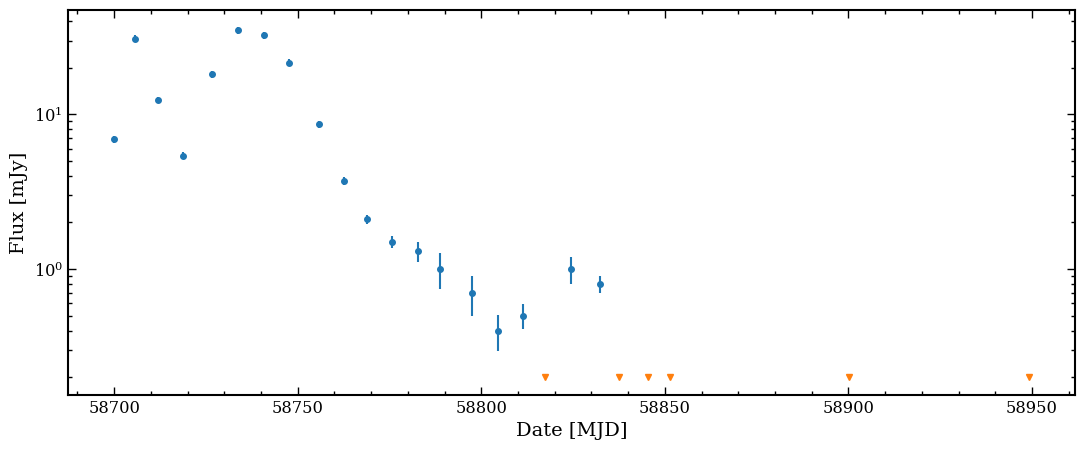

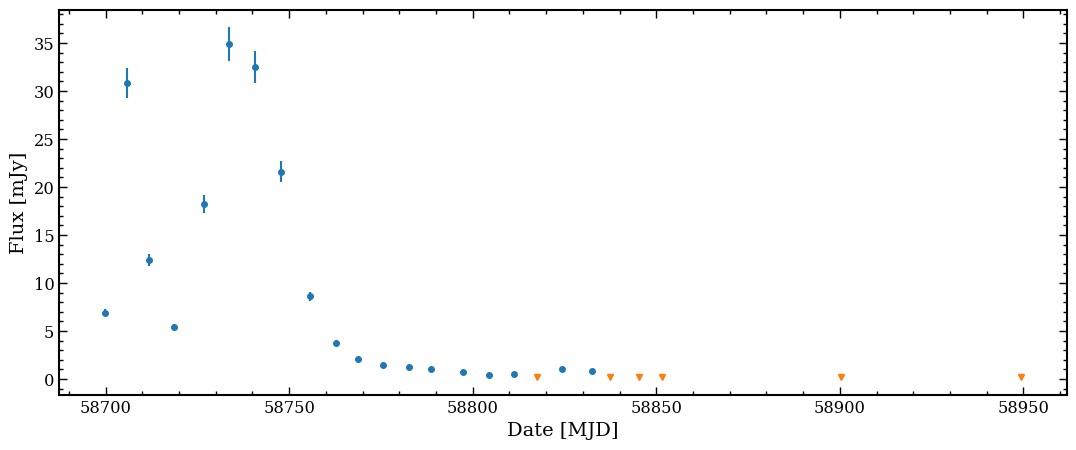

In [8]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [9]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
58699.839000000     6.90000             0.36527             1         1.21000e-08                   1.21413e-09                   1.21413e-09                   False          False          HS             
58705.803000000     30.80000            1.54729             1         3.36000e-08                   3.36595e-09                   3.39700e-09                   False          False          IMS            
58711.904000000     12.40000            0.63789             2         2.22560e-08                   1.92687e-09                   2.92894e-09                   False          False          IMS            
58718.695000000     5.40000             0.28792             1         1.66000e-08                   1.66075e-09                   1.66012e-09                   False          F

In [10]:
paired_data[["t", "state", "Lr", "Lr_unc", "Lx", "Lx_unc_l", "Lx_unc_u"]]

,t,state,Lr,Lr_unc,Lx,Lx_unc_l,Lx_unc_u
0,58699.839,HS,2.140355e+29,1.133066e+28,2.932325e+37,2.942322e+36,2.942322e+36
1,58705.803,IMS,9.554048e+29,4.799631e+28,8.142655e+37,8.157067e+36,8.232318e+36
2,58711.904,IMS,3.846435e+29,1.978703e+28,5.393541e+37,4.669589e+36,7.098013e+36
3,58718.695,SS,1.675060e+29,8.931285e+27,4.022859e+37,4.024684e+36,4.023151e+36
4,58726.779,SS,5.645574e+29,2.855997e+28,6.063370e+37,6.064144e+36,6.064580e+36


In [11]:
lr_all, lx_all, all_types = get_bahramian_data()

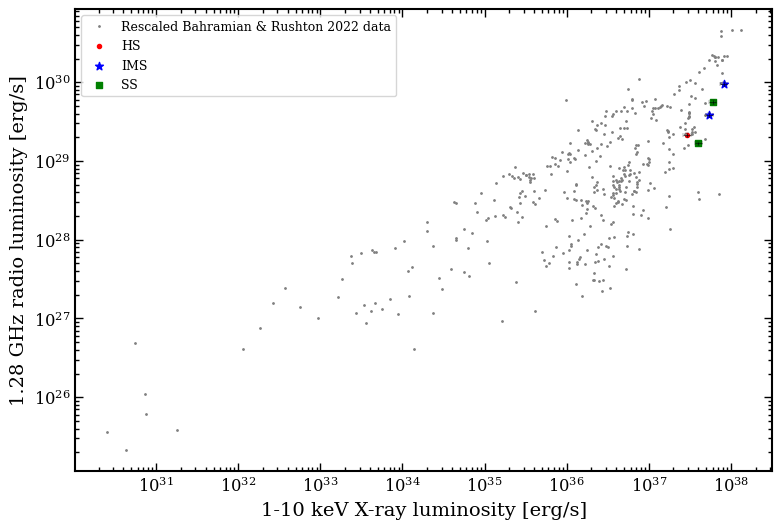

In [12]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

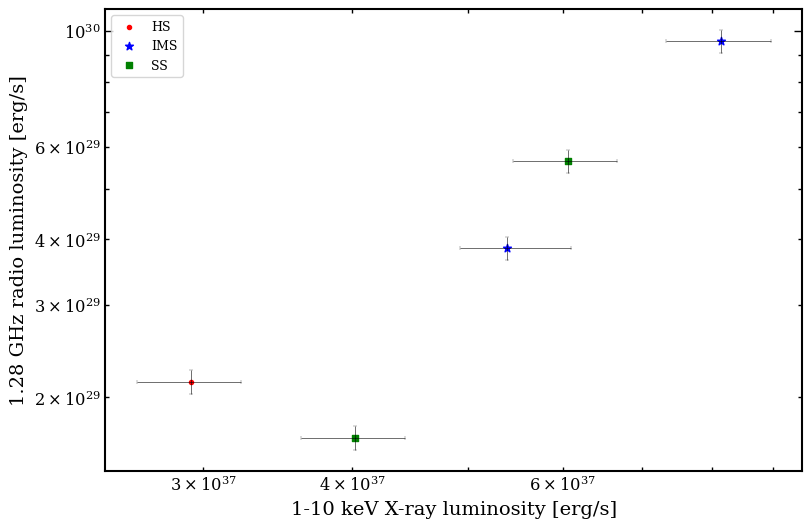

In [13]:
plot_Lr_Lx(paired_data, colourby="state")

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  460
58699.839: time_to_nearest: 0.570930000001681 & time_to_furthest: 2.410439999999653; y_predict_err: 0.045390055558096165
58705.803: time_to_nearest: 0.5110399999975925 & time_to_furthest: 2.438670000003185; y_predict_err: 0.04518679940266335
58711.904: time_to_nearest: 0.42453999999997905 & time_to_furthest: 0.6389400000043679; y_predict_err: 0.06679844105937338
58718.695: time_to_nearest: 0.12541999999666587 & time_to_furthest: 4.464520000001357; y_predict_err: 0.044048099697526766
58726.779: time_to_nearest: 0.4338900000002468 & time_to_furthest: 1.8896999999997206; y_predict_err: 0.0396296717143505
Rejected based on distance: radio_MJD = 58733.692; time_to_nearest: 5.023300000000745; time_to_furthest: 9.315479999997478
Rejected based on distance: radio_MJD = 58740.782; time_to_nearest: 2.225480000000971; time_to_furthest: 12.113299999997253
58747.654: time_to_nearest: 1.1884900000004563 & time_to_furthest: 2.1809600000051432; y_pr

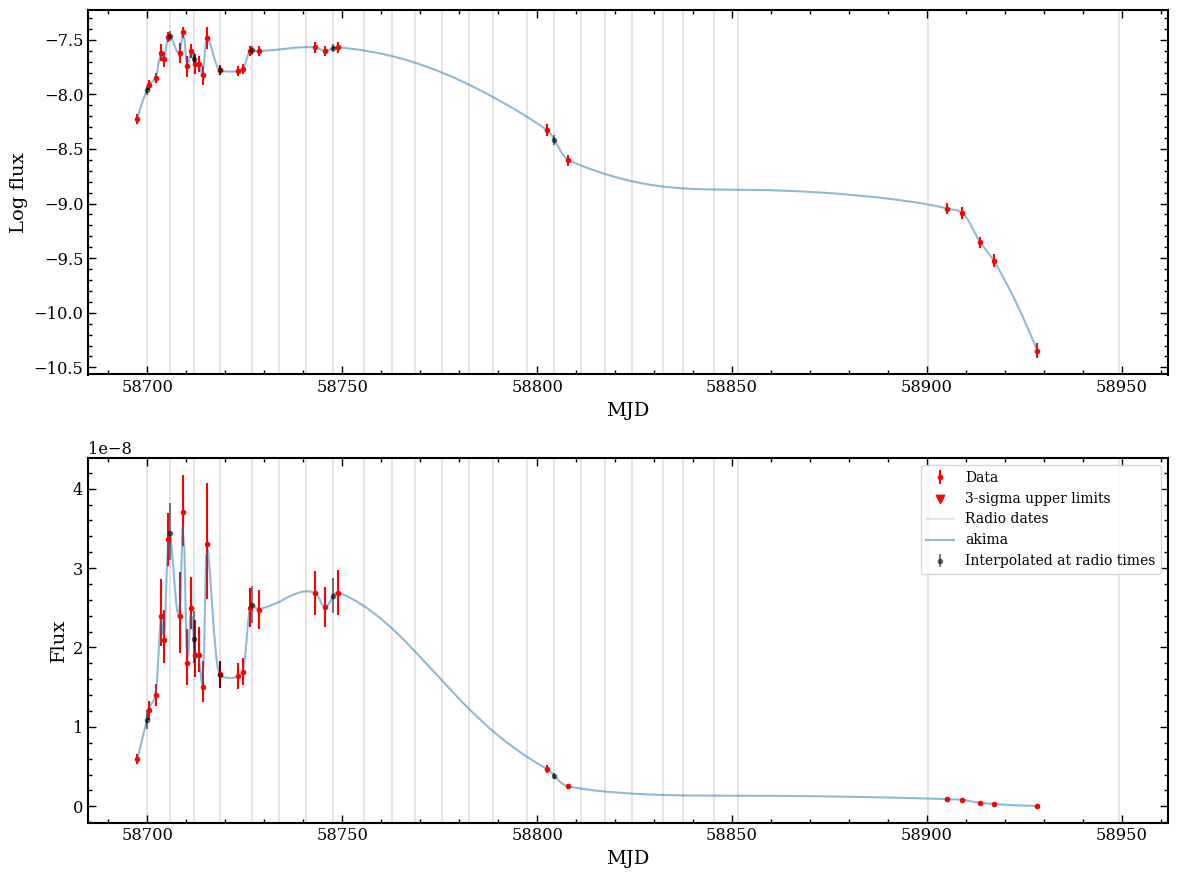

Number of used interpolated data points:  7
Converting to luminosity using d_kpc = 4.5


In [15]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

In [24]:
# The lowest interpolated Lx is 58804.439
interpolated_data[interpolated_data["state"] =="SS"][["t", "Fr", "Lr", "Fx", "Lx"]]

,t,Fr,Lr,Fx,Lx
3,58718.695,5.4,1.675060e+29,1.653819e-08,4.007879e+37
4,58726.779,18.2,5.645574e+29,2.529861e-08,6.130888e+37
5,58747.654,21.6,6.700241e+29,2.643896e-08,6.407243e+37
6,58804.439,0.4,1.240785e+28,3.832122e-09,9.286800e+36


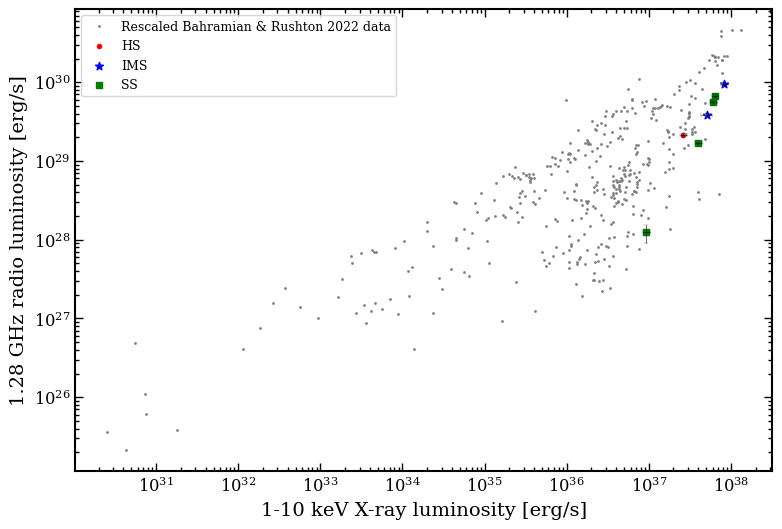

In [16]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)